These are notes for practitioners, hence intuition and utility have been prioritized over adherence to rigour.

# Agenda

 - Simulate Canonical Brownian Motions
 - Integration with respect to CBM measure
 - Bounded Quadratic Variation
 - Statement of Ito's Lemma

In [1]:
import numpy as np
import matplotlib.pyplot as plt

<h3> Definition of Brownian Motion </h3>

Standard Brownian motion, also known as a Wiener process, is a fundamental stochastic process with the following properties:

1. **Initial Value**: $ W(0) = 0 $. The process starts at zero.
2. **Independent Increments**: For any $ 0 \leq t_1 < t_2 < \cdots < t_n $, the increments $ W(t_2) - W(t_1), W(t_3) - W(t_2), \ldots, W(t_n) - W(t_{n-1}) $ are independent random variables.
3. **Stationary Increments**: The increments $ W(t + s) - W(t) $ are normally distributed with mean 0 and variance $ s $, for all $ t, s \geq 0 $. Specifically, $ W(t + s) - W(t) \sim N(0, s) $.
4. **Continuous Paths**: With probability 1, the function $ t \mapsto W(t) $ is continuous.

These properties make Brownian motion a key model in various fields, particularly in finance for modeling stock prices and other financial assets.


In [2]:
#Var(a*X) = a^2 * Var(X)
#Sample from N(0,1)
#sqrt(dt)* N(0,1) -- Var = dt
# Int dB = B
# Int f(B) dB -> F(B)

In [63]:
1000*.001

1.0

In [64]:
# Parameters
n_paths = 10000  # Number of Brownian paths to simulate
n_steps = 1000  # Number of steps in each path
dt = .001  # Time step size
sqrt_dt = np.sqrt(dt)

In [65]:
# Generate Brownian paths via sampling
dBs = np.random.randn(n_paths, n_steps) * sqrt_dt
paths = np.cumsum(dBs, axis=1)
dBdBs = dBs * dBs
dBdBsTot = np.cumsum(dBdBs, axis=1)

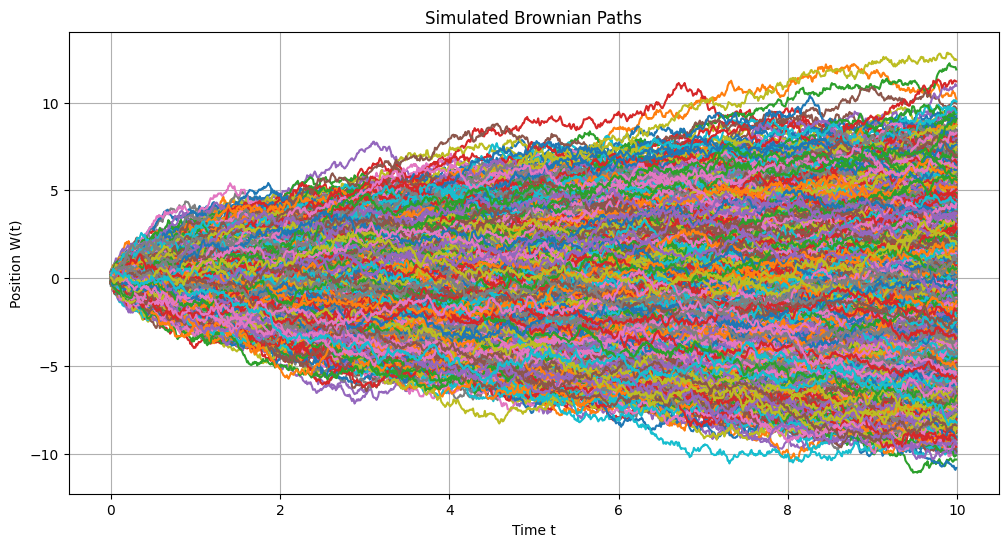

In [55]:
# Plotting
plt.figure(figsize=(12, 6))
for i in range(n_paths):
    plt.plot(np.arange(0, n_steps*dt, dt), paths[i])
plt.title('Simulated Brownian Paths')
plt.xlabel('Time t')
plt.ylabel('Position W(t)')
plt.grid(True)
plt.show()


Let us try to integrate $\int_0^T B \, dB$. Our intuition from definite integrals would imply that the *left sum* $\sum B(t_i) \; \Delta B$ and the *right sum* $\sum B(t_i + \Delta t) \; \Delta B$ both should converge to the same value (here, a probability distribution rather than a deterministic value). However, we will see below that they do not converge.

In [66]:
lSum = np.cumsum((paths-dBs)*dBs,axis=1)
rSum = np.cumsum(paths*dBs,axis=1)

In [67]:
lSum[:,-1]

array([-0.45675193,  0.23299552,  0.1358702 , ...,  0.76932453,
       -0.52027219, -0.16346133])

In [68]:
rSum[:,-1]

array([0.50206389, 1.27028547, 1.1612789 , ..., 1.73865691, 0.53673579,
       0.83159868])

In [69]:
rSum[:,-1]-lSum[:,-1]

array([0.95881582, 1.03728996, 1.0254087 , ..., 0.96933238, 1.05700798,
       0.99506002])

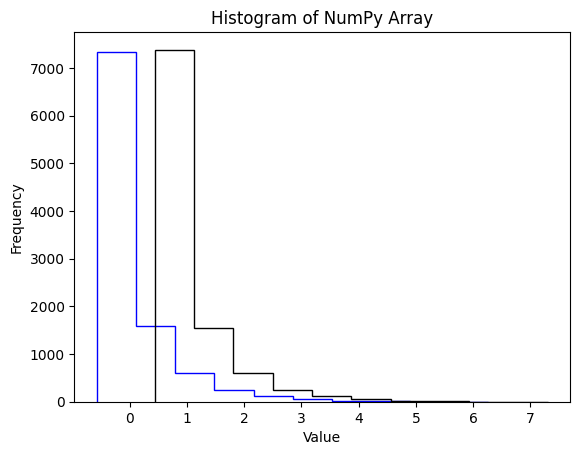

In [70]:
# Plot the histogram
plt.hist(lSum[:,-1], bins=10, edgecolor='blue',histtype='step')
plt.hist(rSum[:,-1], bins=10, edgecolor='black',histtype='step')

# Add labels and title
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('Histogram of NumPy Array')

# Show the plot
plt.show()

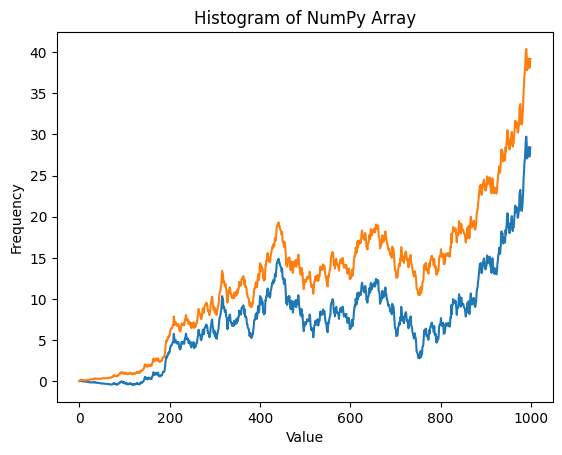

In [61]:
plt.plot(lSum[-1])
plt.plot(rSum[-1])

# Add labels and title
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('Histogram of NumPy Array')

# Show the plot
plt.show()

# Bounded Quadratic Variations

This discrepance between the left and right sums is because, the integral $\int_0^T dB \wedge dB$ does not vanish. This property is called bounded quadratic variation.

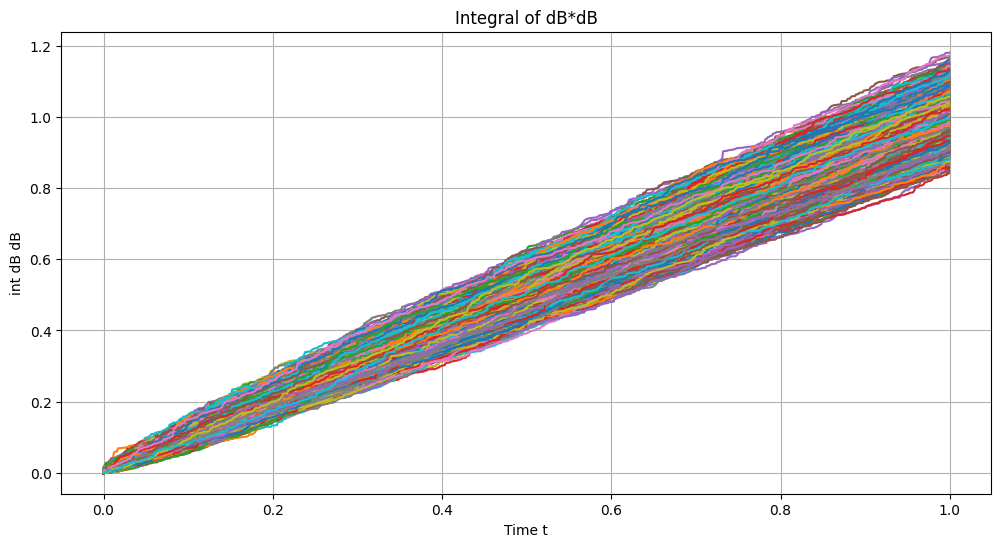

In [71]:
# Plotting
plt.figure(figsize=(12, 6))
for i in range(n_paths):
    plt.plot(np.arange(0, n_steps*dt, dt), dBdBsTot[i])
plt.title('Integral of dB*dB')
plt.xlabel('Time t')
plt.ylabel('int dB dB')
plt.grid(True)
plt.show()